# Project: Exploratory Data Analysis on Seattle Airbnb Data
### Project Due on Friday 10th Dec 2021, 11:59 pm EST

#### Context
Since 2008, guests and hosts have used Airbnb to travel in a more unique, personalized way. As part of the Airbnb Inside initiative, this dataset describes the listing activity of homestays in Seattle, WA.

#### Content
The following Airbnb data is included in this Seattle dataset:
- Listings, including full descriptions and average review score
- Reviews, including unique id for each reviewer and detailed comments
- Calendar, including listing id and the price and availability for that day

**To get the dataset click [here](https://georgiancollege-my.sharepoint.com/:f:/g/personal/katie_tiwari_georgiancollege_ca/Eh6hG8jQX_FBvU_pk5R5wZwB_xn5gS2eBE1vWQ_DmaH1kQ?e=evqomn)**

#### Inspiration for questions
- Can you describe the vibe of each Seattle neighborhood using listing descriptions?
- What are the busiest times of the year to visit Seattle? By how much do prices spike?
- Is there a general upward trend of both new Airbnb listings and total Airbnb visitors to Seattle?

#### **Note:** Don't discuss the results, limitations, conclusion, reasons as comment in the code cell. Use separate markdown cells instead. If you are not familier with markdown, refer this [link here](https://www.datacamp.com/community/tutorials/markdown-in-jupyter-notebook). Only add code related comments as comment in the code cell. Also Make sure to add comments in the code.

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> In this section of the report, provide a brief introduction to the dataset you've selected for analysis. 

- Create atleast three complex and meaningful questions(refer inspiration questions to get an idea), then address those questions in the rest of the analysis. If you're not sure what questions to ask, then make sure you familiarize yourself with the dataset, its variables and the dataset context for ideas of what to explore.
- **Include the 3 research questions here**



The datasets used for the analysis of data related to the Airbnb listings in Seattle are listings, reviews and calendar. Calendar dataset provides data around the availability status of  particular listing being avialable on a particular date. If the listing is available, the price is also provided for the same and incase a listing is not available there is no data in the price column.
Reviews data links the listings with the booking id's and the customer reviews for those particular listings. 
Listings dataset shares the most amount of data related to the listings. These data go into depth explaining reviews, amneties, number of reviews, number of rooms,beds and bathrooms, space, description etc. This dataset basically provides a complete portfolio of a listing and can be used to analyze the trends and dependency of parameters across all listings.

The datasets that I have majorly used for my analysis are the calendar and listings as my analysis focuses more around the price trends and listing review scores. 

1. What was the busiest month of the year 2016 to visit Seattle? By how much were the Airbnb prices hiked compared to the other months?
2. Does more number of reviews of a listing mean that the overall reviews are better?
3. What are the various factors that had an impact on the reviews of a listing in Seattle?

In [1]:
# Use this, and more code cells, to explore your data. Don't forget to add markdown cells to document your observations and findings.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


<a id='wrangling'></a>
## Data Wrangling

> In this section of the report, you will load in the data, check for cleanliness, merging multiple files, printing some rows of the data in output, handling missing values, duplicat values, outliers etc. and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and privde the reasoning for every decision taken.

In [2]:
# Use this, and more code cells, to explore your data. Don't forget to add markdown cells to document your observations and findings. 
df_calendar = pd.read_csv("calendar.csv")
df_listings = pd.read_csv("listings.csv")
df_reviews = pd.read_csv("reviews.csv")

Reading data from the files and storing them in dataframe.

In [3]:
df_calendar.info()
#Checking the data type and structure of data in the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   listing_id  1393570 non-null  int64 
 1   date        1393570 non-null  object
 2   available   1393570 non-null  object
 3   price       934542 non-null   object
dtypes: int64(1), object(3)
memory usage: 42.5+ MB


In [4]:
df_listings.info()
#Checking the data type and structure of data in the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3818 non-null   int64  
 1   listing_url                       3818 non-null   object 
 2   scrape_id                         3818 non-null   int64  
 3   last_scraped                      3818 non-null   object 
 4   name                              3818 non-null   object 
 5   summary                           3641 non-null   object 
 6   space                             3249 non-null   object 
 7   description                       3818 non-null   object 
 8   experiences_offered               3818 non-null   object 
 9   neighborhood_overview             2786 non-null   object 
 10  notes                             2212 non-null   object 
 11  transit                           2884 non-null   object 
 12  thumbn

In [5]:
df_reviews.info()
#Checking the data type and structure of data in the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84849 entries, 0 to 84848
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   listing_id     84849 non-null  int64 
 1   id             84849 non-null  int64 
 2   date           84849 non-null  object
 3   reviewer_id    84849 non-null  int64 
 4   reviewer_name  84849 non-null  object
 5   comments       84831 non-null  object
dtypes: int64(3), object(3)
memory usage: 3.9+ MB


In [6]:
df_calendar.isnull().sum()
#Checking for null values in the data

listing_id         0
date               0
available          0
price         459028
dtype: int64

In [7]:
print(df_listings.sum()[df_listings.isnull().sum()!=0])
#Checking for null values in the data

host_listings_count             27314.0
host_total_listings_count       27314.0
bathrooms                        4788.5
bedrooms                         4985.0
beds                             6624.0
square_feet                     82898.0
review_scores_rating           299784.0
review_scores_accuracy          30451.0
review_scores_cleanliness       30246.0
review_scores_checkin           30926.0
review_scores_communication     31067.0
review_scores_location          30393.0
review_scores_value             29888.0
license                             0.0
reviews_per_month               6633.83
dtype: object


In [8]:
df_reviews.isnull().sum()
#Checking for null values in the data

listing_id        0
id                0
date              0
reviewer_id       0
reviewer_name     0
comments         18
dtype: int64

In [9]:
df_calendar['date'] = pd.to_datetime(df_calendar['date'])
type(df_calendar.date.iloc[0])
#Converting the date string to date time format.

pandas._libs.tslibs.timestamps.Timestamp

In [10]:
type(df_calendar.price.iloc[0])

str

In [11]:
df_calendar.dropna(subset = ["price"], inplace=True) 
df_calendar['price'].isnull().sum()

0

Dropping the values that have null in price column of df_calendar data as the data is null only when the listing is not available. Hence, the data should be removed instead of being replaced with some value as it may change the mean value. 

In [12]:
def remove_char(price):
    val = ""
    if type(price) is str:
        for i in price:
            if i=="$" or i==",":
                pass
            else:
                val = val + i
        return val
    else:
        return price
    
df_calendar['price'] = df_calendar.price.apply(remove_char)
df_calendar['price']
# Removing $ and , from price.

0          85.00
1          85.00
9          85.00
10         85.00
14         85.00
           ...  
1393207    87.00
1393208    87.00
1393211    87.00
1393212    87.00
1393213    87.00
Name: price, Length: 934542, dtype: object

In [13]:
df_calendar['price'] = df_calendar['price'].astype(float)
type(df_calendar.price.iloc[0])
# After removing the characters, converting the price to float for further analysis.

numpy.float64

In [14]:
df_reviews['date'] = pd.to_datetime(df_reviews['date'])
type(df_reviews.date.iloc[0])
# Converting the date cloumn in reviews table from string to date time format

pandas._libs.tslibs.timestamps.Timestamp

In [15]:
df_reviews.dropna(inplace=True)
df_reviews.isnull().sum()
# Dropping the rows having any null values in the reviews table

listing_id       0
id               0
date             0
reviewer_id      0
reviewer_name    0
comments         0
dtype: int64

In [16]:
df_reviews.info()
# Checking the cloumn types

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84831 entries, 0 to 84848
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   listing_id     84831 non-null  int64         
 1   id             84831 non-null  int64         
 2   date           84831 non-null  datetime64[ns]
 3   reviewer_id    84831 non-null  int64         
 4   reviewer_name  84831 non-null  object        
 5   comments       84831 non-null  object        
dtypes: datetime64[ns](1), int64(3), object(2)
memory usage: 4.5+ MB


In [17]:
mean_beds = int(df_listings.beds.mean())

In [18]:
df_listings.beds.fillna(mean_beds, inplace=True)
df_listings['beds'].isnull().sum()
# Replacing the null values in beds column in listings dataframe with the mean value.

0

In [19]:
df_listings['price'].fillna(0, inplace=True)
df_listings['price'] = df_listings.price.apply(remove_char)
df_listings['price'] = df_listings['price'].astype(float)
df_listings['price']
# Filling up the null values in price column in df_listings and converting it to float after removing the symbols.

0        85.0
1       150.0
2       975.0
3       100.0
4       450.0
        ...  
3813    359.0
3814     79.0
3815     93.0
3816     99.0
3817     87.0
Name: price, Length: 3818, dtype: float64

In [20]:
df_listings[df_listings.duplicated()]
# Checking for duplicates in the data

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month


In [21]:
df_calendar[df_calendar.duplicated()]

,listing_id,date,available,price


In [22]:
df_reviews[df_reviews.duplicated()]

,listing_id,id,date,reviewer_id,reviewer_name,comments


In [23]:
mean_ratings = int(df_listings.review_scores_rating.mean())
df_listings['review_scores_rating'].fillna(mean_ratings, inplace=True)
# Filling up the review_scores_rating data in df_listings with the mean value
df_listings['review_scores_rating'].isnull().sum()
# Checking for any existing null values after replacing them

0

<a id='eda'></a>
## Exploratory Data Analysis

> Now you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. Look at one variable at a time, and then follow it up by looking at relationships between variables.

- The EDA should include both single-variable (1d) and multiple-variable (2d) explorations. 
- The project's visualizations should be varied and show multiple comparisons and trends. At least three kinds of plots(eg. histogram, box plot, line plot, bar plot, etc) should be created as part of the explorations.
- Please make sure reasoning is provided for each analysis decision, plot, and statistical summary.
- Visualizations made in the notebook, should depict the data in an appropriate manner (i.e., has appropriate axis labels, scale, legends, and title) that allows plots to be readily interpreted.

### 1. What was the busiest month of the year 2016 to visit Seattle? By how much were the Airbnb prices hiked compared to the other months?

In [24]:
# Use this, and more code cells, to explore your data. Don't forget to add markdown cells to document your observations and findings.
df_calendar['year'] = pd.DatetimeIndex(df_calendar['date']).year
df_calendar['month'] = pd.DatetimeIndex(df_calendar['date']).month
df_calendar
# Breaking down the time data to year and month to analyze the monthly listings and price

,listing_id,date,available,price,year,month
0,241032,2016-01-04,t,85.0,2016,1
1,241032,2016-01-05,t,85.0,2016,1
9,241032,2016-01-13,t,85.0,2016,1
10,241032,2016-01-14,t,85.0,2016,1
14,241032,2016-01-18,t,85.0,2016,1
...,...,...,...,...,...,...
1393207,10208623,2016-01-06,t,87.0,2016,1
1393208,10208623,2016-01-07,t,87.0,2016,1
1393211,10208623,2016-01-10,t,87.0,2016,1
1393212,10208623,2016-01-11,t,87.0,2016,1


Text(0.5, 1.0, 'Number of listings per month in 2016')

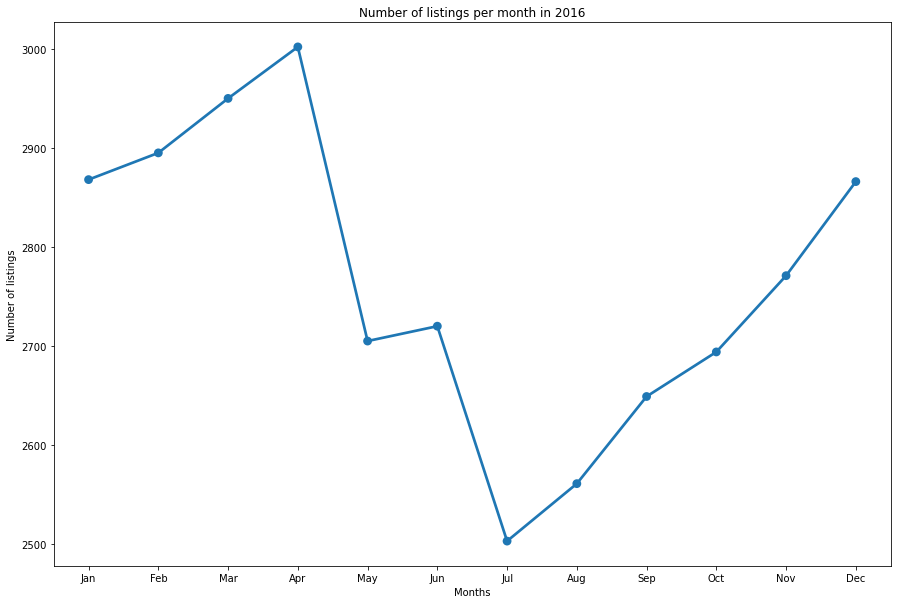

In [25]:
listings_per_month = pd.Series([12]) 
# Calculating the listings available per month
for i in range(1, 13):
    listings_per_month[i] = len(df_calendar[(df_calendar['month'] == i) & (df_calendar['year'] == 2016)]['listing_id'].unique())
    
listings_per_month = listings_per_month.drop(0)


months = ['Jan', 'Feb', 'Mar', 'Apr', 'May' , 'Jun' , 'Jul' , 'Aug' , 'Sep' , 'Oct' , 'Nov' , 'Dec']
plt.subplots(figsize = (15,10))
ax = sns.pointplot(x = months, y = listings_per_month)
plt.ylabel('Number of listings')
plt.xlabel('Months')
plt.title('Number of listings per month in 2016')

From the above plot, it can be seen that the month of July had the lowest number of listings available, thereby making it the bussiest month of 2016.

In [26]:
yearDF=df_calendar.groupby(['year','month']).price.mean()
yearDF=yearDF.reset_index()
yearDF=yearDF.rename(columns={'price':'average_Price'})
yearDF['year-Month']=yearDF['year'].map(str) + "-" + yearDF['month'].map(str)
yearDF = yearDF[yearDF['year']==2016]
yearDF

,year,month,average_Price,year-Month
0,2016,1,121.568409,2016-1
1,2016,2,124.293927,2016-2
2,2016,3,128.644488,2016-3
3,2016,4,135.097005,2016-4
4,2016,5,139.538183,2016-5
5,2016,6,147.473137,2016-6
6,2016,7,152.094150,2016-7
7,2016,8,150.656594,2016-8
8,2016,9,143.255949,2016-9
9,2016,10,137.031939,2016-10


<AxesSubplot:title={'center':'Seattle Airbnb prices trend over months'}, xlabel='year-Month', ylabel='average_Price'>

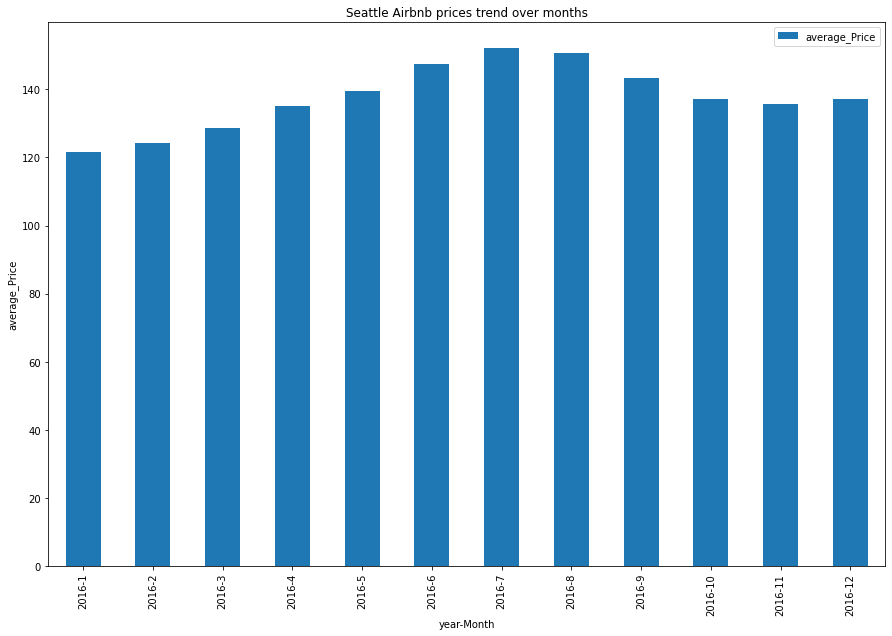

In [27]:
yearDF.plot(kind='bar', 
           x='year-Month',
           y='average_Price',
           figsize =(15,10), 
           title = 'Seattle Airbnb prices trend over months', ylabel = 'average_Price')

From the above graph, it is evident that the highest prices of the airbnb was also observed in July, 2016. Now to find out the exact hike in prices, we need to find the average price of the Airbnbs across all the months of 2016.  

In [28]:
average_monthly_price = yearDF['average_Price'].mean()
hike_price = (yearDF[yearDF['year-Month']=='2016-7']['average_Price'])-average_monthly_price
hike_price

6    14.377954
Name: average_Price, dtype: float64

During the month of December 2016, the average prices of airbnnb's were hiked by 14.37 dollars compared to the average price of that year.

### Q2. Does more number of reviews of a listing mean that the overall reviews are better? Also, does higher number of reviews mean higher price of the listing?

Text(0, 0.5, 'average score of reviews')

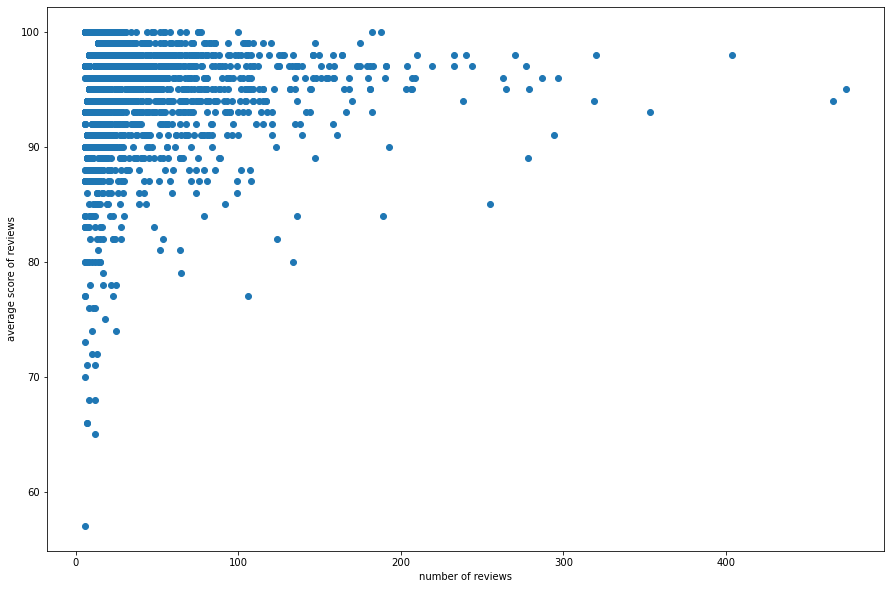

In [29]:
list_df2 = df_listings[df_listings['number_of_reviews']>5] 
# Storing the data of all the listings that have more than 5 reviews in list_df2
plt.figure(figsize = (15,10))
plt.plot(list_df2['number_of_reviews'],list_df2['review_scores_rating'],'o',label='data')
plt.xlabel('number of reviews')
plt.ylabel('average score of reviews')

From the above graph, it can be seen that the listings having more than 300 reviews have a very good  review score. However, listings having less than 200 reviews have a mixed review score ranging from low to high. Hence, it would be fair to say that higher reviews imply that the overall reviews are better.

In [30]:
df2 = df_listings[['id', 'host_id', 'number_of_reviews','reviews_per_month',
                        'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 
                        'review_scores_checkin', 'review_scores_communication', 
                        'review_scores_location', 'review_scores_value', 'price']]
df2.dropna(inplace=True)
# Removing null values from the trimmed data Frame
df2['review_metric'] = (df2['review_scores_rating'] + df2[['review_scores_accuracy', 'review_scores_cleanliness', 
                                                                                      'review_scores_checkin', 'review_scores_communication', 
                                                                                      'review_scores_location', 'review_scores_value']].mean(axis=1) * 10)
# Calculating the total review scores based on the available metrics for the listings
df2 = df2[['id', 'host_id', 'number_of_reviews','reviews_per_month',
                             'review_metric', 'price']]
df2

<ipython-input-30-16bc527660da>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.dropna(inplace=True)
<ipython-input-30-16bc527660da>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['review_metric'] = (df2['review_scores_rating'] + df2[['review_scores_accuracy', 'review_scores_cleanliness',


,id,host_id,number_of_reviews,reviews_per_month,review_metric,price
0,241032,956883,207,4.07,193.333333,85.0
1,953595,5177328,43,1.48,196.000000,150.0
2,3308979,16708587,20,1.15,197.000000,975.0
4,278830,1452570,38,0.89,185.333333,450.0
5,5956968,326758,17,2.45,195.000000,120.0
...,...,...,...,...,...,...
3810,262764,1379138,5,1.56,183.666667,154.0
3811,8578490,11847918,2,0.63,195.000000,65.0
3812,3383329,3443346,73,4.01,194.333333,95.0
3813,8101950,31148752,1,0.30,160.000000,359.0


Text(0.5, 1.0, 'Price vs Review Score')

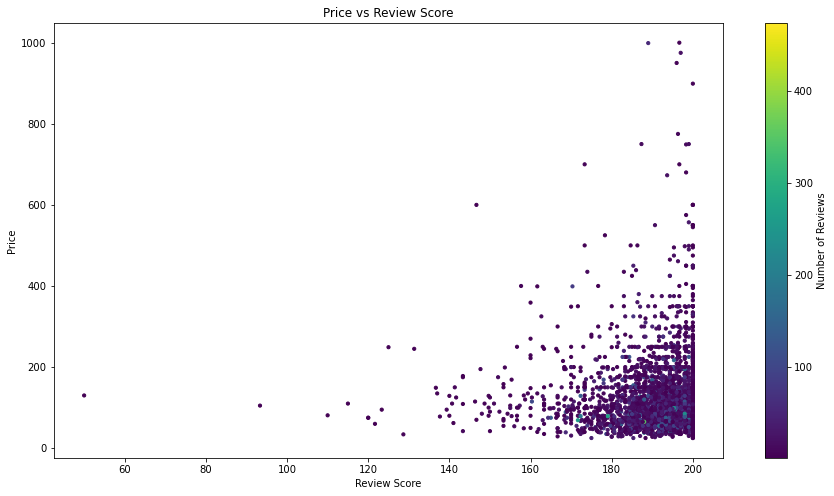

In [31]:
fig, ax = plt.subplots(figsize=(15,8))
p = ax.scatter(df2['review_metric'], df2['price'], s=10, c=df2['number_of_reviews'])
colorbar = fig.colorbar(p)
colorbar.set_label("Number of Reviews")
ax.set_xlabel("Review Score")
ax.set_ylabel("Price")
ax.set_title("Price vs Review Score")

From the above figure, it can be determined that listings with low review score are usually low priced, but listings with higer review score are spread over a range of price starting from low to high.

### Q3. What are the various factors that had an impact on the reviews of a listing in Seattle?

In [32]:
response_time_review = df_listings['review_scores_rating'].groupby(df_listings['host_response_time']).mean()
# Grouping the review_scores_rating in terms of host_response_time to plot and find any relation
response_time_review = response_time_review.sort_values(ascending=False) # Sorting the values
response_time_review

host_response_time
within an hour        95.028369
within a day          94.209380
within a few hours    93.837810
a few days or more    89.263158
Name: review_scores_rating, dtype: float64

<ipython-input-33-84bc8819c84e>:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(response_time_review.index)


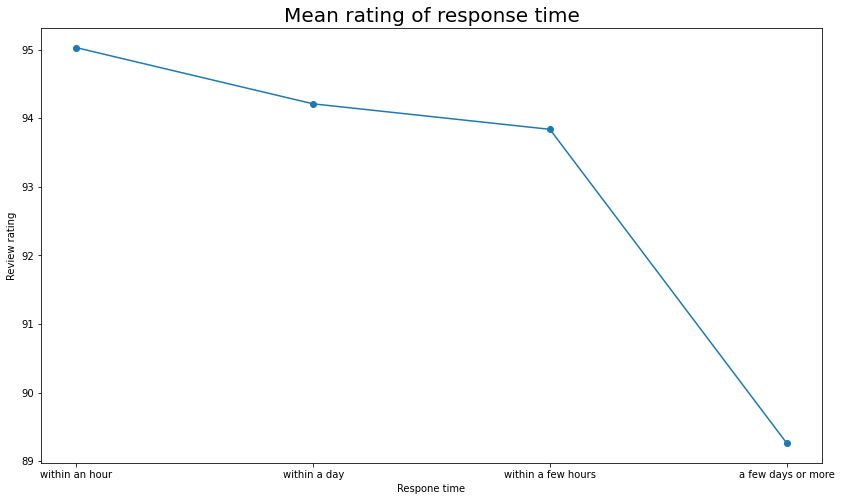

In [33]:
f, ax = plt.subplots(1,1, figsize=(14,8))
ax.plot(response_time_review, 'o-')
ax.set_xticklabels(response_time_review.index)
ax.tick_params('x')
plt.ylabel('Review rating')
plt.xlabel('Respone time')
plt.title('Mean rating of response time', fontsize=20)
plt.show()

From the above figure, we can see that the host_response_time clearly has on impact on the review ratings. The hosts with good response time have a better average review rating score. The average review rating score keeps decreasing with the delay in response time of the host.

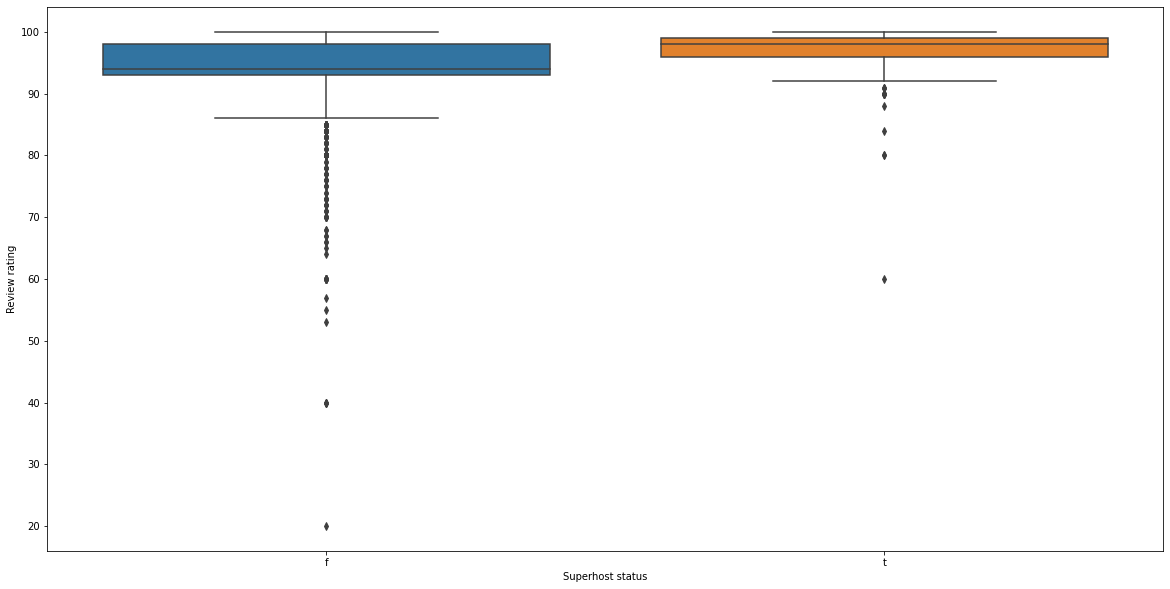

In [34]:
plt.figure(figsize=(20,10))
sns.boxplot(x='host_is_superhost', y='review_scores_rating', data=df_listings) # Plotting the host_is_superhost with review_scores_rating to check if superhosts usually got a better rating.
plt.ylabel('Review rating')
plt.xlabel('Superhost status')
plt.show()

From above, it is clear that the average review_scores_rating for super hosts is better than the listings owned by others. Superhosts have an average review_scores_rating very close to 100 and the candles show that the rating density of the superhosts are very high near 100.

In [35]:
cancellation_rating = df_listings['review_scores_rating'].groupby(df_listings['cancellation_policy']).mean()
cancellation_rating = cancellation_rating.sort_values(ascending=False)
cancellation_rating

cancellation_policy
moderate    94.609113
flexible    94.549565
strict      94.223006
Name: review_scores_rating, dtype: float64

<ipython-input-36-0258754f435f>:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(cancellation_rating.index)


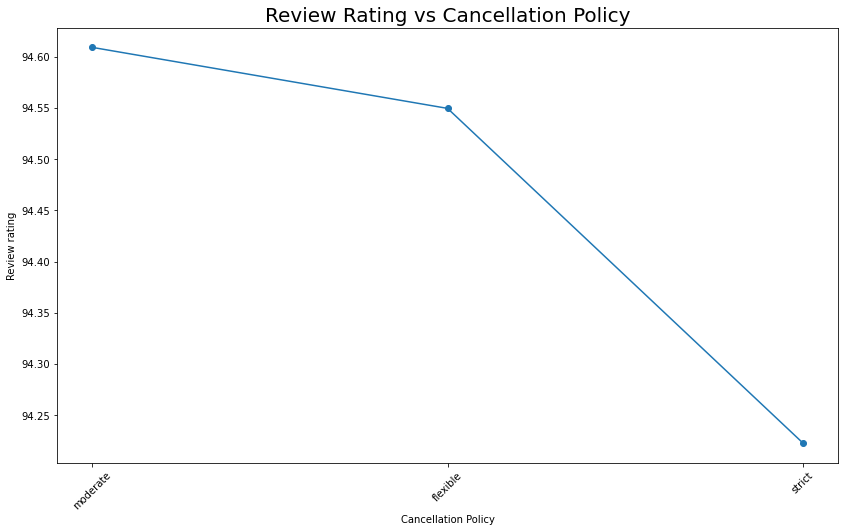

In [36]:
f, ax = plt.subplots(1,1, figsize=(14,8))
ax.plot(cancellation_rating, 'o-')
ax.set_xticklabels(cancellation_rating.index)
ax.tick_params('x', labelrotation=45)
plt.ylabel('Review rating')
plt.xlabel('Cancellation Policy')
plt.title('Review Rating vs Cancellation Policy', fontsize=20)
plt.show()

From the above figure, it can be seen that the review ratings of listings having moderate cancellation policy usually has the highest review rating and there is a drastic drop in mean review ratings that had strict cancellation policy.

In [37]:
property_type_rating = df_listings['review_scores_rating'].groupby(df_listings['property_type']).mean()
property_type_rating = property_type_rating.sort_values(ascending=False)
property_type_rating

property_type
Yurt               100.000000
Bungalow            96.538462
Cabin               96.238095
Other               95.954545
Townhouse           95.779661
Treehouse           95.333333
Camper/RV           95.307692
Bed & Breakfast     95.216216
Loft                95.200000
Boat                95.000000
Condominium         95.000000
House               94.702250
Tent                94.400000
Apartment           93.981265
Dorm                90.000000
Chalet              83.500000
Name: review_scores_rating, dtype: float64

<AxesSubplot:title={'center':'Review rating Vs Property Type'}, xlabel='property_type', ylabel='Review rating'>

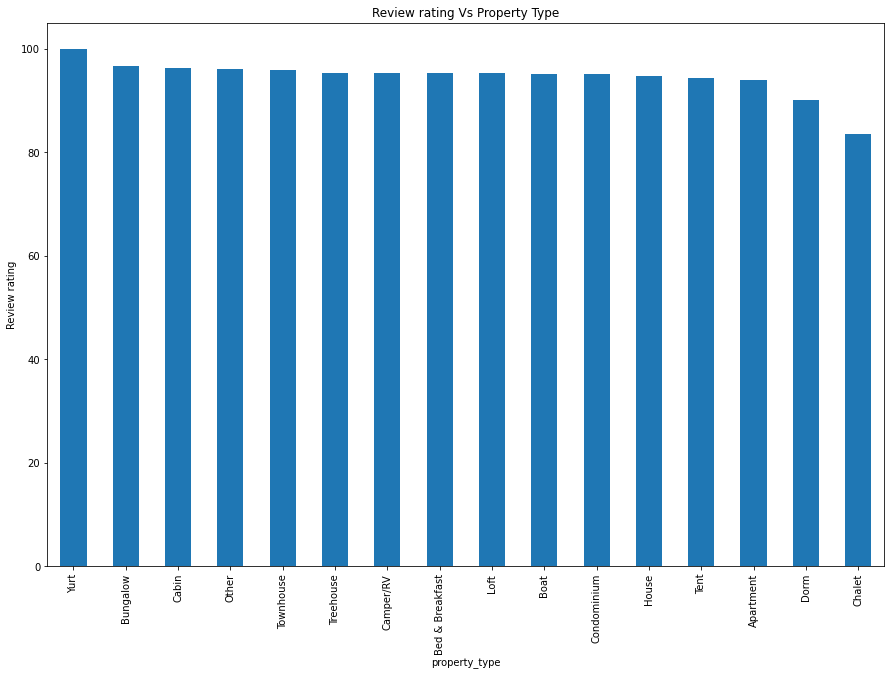

In [38]:
property_type_rating.plot(kind='bar', 
           x='review_scores_rating',
           y='property_type',
           figsize =(15,10), 
           title = 'Review rating Vs Property Type', ylabel = 'Review rating'
          )

In the above plot, yurt is seen to have the highest average review rating and chalet have the lowest average review ratings.

In [39]:
room_type_rating = df_listings['review_scores_rating'].groupby(df_listings['room_type']).mean()
room_type_rating = room_type_rating.sort_values(ascending=False)
room_type_rating

room_type
Private room       94.660345
Entire home/apt    94.399449
Shared room        93.393162
Name: review_scores_rating, dtype: float64

<ipython-input-41-8a96ac5308b7>:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(room_type_rating.index)


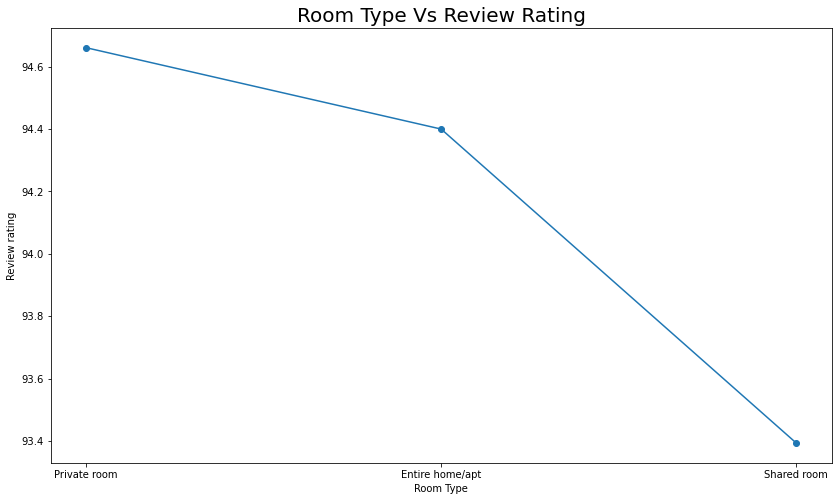

In [41]:
f, ax = plt.subplots(1,1, figsize=(14,8))
ax.plot(room_type_rating, 'o-')
ax.set_xticklabels(room_type_rating.index)
ax.tick_params('x')
plt.ylabel('Review rating')
plt.xlabel('Room Type')
plt.title('Room Type Vs Review Rating', fontsize=20)
plt.show()

From above, it can be seen that Entire home/apt and private room almost had the similar mean review rating and shared room had the lowest review rating.

<a id='conclusions'></a>
## Conclusions

> At the end, summarize your findings and the results that have been performed. 
- The Conclusion should reflect on the steps taken during the data exploration, summarize the main findings in relation to the questions provided at the beginning of the analysis accurately.
- The conclusion points out where additional research can be done or where additional information could be useful and **should have at least 1 limitation explained clearly.**
- The analysis should not state or imply that one change causes another based solely on a correlation. You can refer to this video on [Correlation does not mean Causation](https://youtu.be/VMUQSMFGBDo)


From the provided data, it can be seen that the bussiest month was July, 2016 and the prices for listings in the month of July were also highest compared to the other months. From the data, we could also infer that the higher number of reviews for a listing meant that there were better reviews and that highly rated listings were usually spread available in all types of price range. 
To understand the effects of certain parameter on customer satisfaction, we also plotted multiple such parameters with the review_scores_rating and noticed that some parameters like host_response_time, cancellation_policy, superhost_status and property_type had a huge impact on customer ratings. However, it was seen that the parameter room_type had very less impact on the review_scores_rating. This explains the important features that could help a listing get a better review_scores_rating.


According to me, the listings dataset could have included the first operation date for the airbnb's instead of first_review as it is not an appropriate measure of years of operation of a listing. This data could have allowed to analyze the review_score_ratings based on the number of years of operation of the listings. This would probably give a fair estimate of how customers rated the older and newer listings.